In [44]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [45]:
finviz_url = 'https://finviz.com/quote.ashx?t='

In [65]:
tickers = ['DOX', 'AMD', 'NVDA']
news_tables = {}

for ticker in tickers:
    url = finviz_url + ticker
    req = Request(url = url, headers = {'user-agent' : 'my-app'})
    response = urlopen(req)

    html = BeautifulSoup(response, 'html')
    news_table = html.find(id = 'news-table')
    news_tables[ticker] = news_table


In [66]:
for index, row in enumerate(amzn_rows):
  a_tag = row.find('a')
  time_stamp = row.td.text
  if a_tag:
    title = a_tag.text
    print(time_stamp + " " + title)
  else:
    print(f"No <a> tag found in row {index}")




            Jul-13-24 02:00PM
         3 AI Stocks Paving Your Path to Seven-Figure Wealth

            10:30AM
         Amazon is worried about upstarts like Temu and Shein. Here's how it's confronting them.

            10:06AM
         ClearBridge Sustainability Leaders Strategy Added Amazon.com (AMZN) to its Portfolio in Q2

            08:00AM
         Two Dow Jones Giants And Tesla's Archrival Lead Five Stocks Near Buy Points

            08:00AM
         The 3 Best Stocks to Buy for Q3 2024
No <a> tag found in row 5

            07:47AM
         Did Amazon Just Say "Checkmate" to Pinduoduo? 1 Big Move Investors Should Watch

            06:45AM
         Forget Apple: Consider These 2 Millionaire-Maker Stocks Instead

            05:45AM
         Is It Too Late to Buy Amazon Stock?

            05:12AM
         6 Artificial Intelligence (AI) Stocks Inside Warren Buffett's $410 Billion Portfolio

            04:45AM
         Amazon: Buy, Sell or Hold?

            03:32AM
       

In [67]:
parsed_data = []

for ticker, news_table in news_tables.items():
  for row in news_table.findAll('tr'):
    if row.a:
      title = row.a.get_text()
      date_data = row.td.text.split()

      if len(date_data) == 1:
        time = date_data[0]
        date = None
      else:
        date = date_data[0]
        time = date_data[1]

      parsed_data.append([ticker, date, time, title])
print(parsed_data)

[['DOX', 'Jul-10-24', '07:04AM', 'What Makes Amdocs (DOX) an Attractive Investment?'], ['DOX', None, '06:53AM', 'Is this a Good Time to Add TrueBlue (TBI) to Your Portfolio?'], ['DOX', None, '06:21AM', "Will Carter's (CRI) be Able to Maintain its Industry Leadership Position?"], ['DOX', 'Jun-30-24', '02:06PM', '3 Stocks Lead The Charge In Dividend Growth And Innovation'], ['DOX', None, '11:22AM', "3 Dividend Ideas In Today's Market"], ['DOX', 'Jun-21-24', '09:22AM', '3 Undiscovered Stocks to Buy Before Their Big Breakout Rally'], ['DOX', 'Jun-20-24', '02:00PM', 'Ahead of the Curve: 3 Tech Stocks to Get In on Early'], ['DOX', None, '11:32AM', 'Growth And Income? These Tech Stocks Offer Both'], ['DOX', 'Jun-18-24', '02:00AM', 'Amdocs Collaborates with Google Cloud for Real-Time Data Insights'], ['DOX', 'Jun-13-24', '09:01AM', "Amdocs (DOX) & Oracle's Partnership Secure Major Deal From AT&T"], ['DOX', 'Jun-12-24', '09:18AM', 'Amdocs (DOX), Google Cloud Partner to Enhance eSIM Capabilities

In [68]:
df = pd.DataFrame(parsed_data, columns = ['Ticker', 'Date', 'Time', 'Title'])
df.head()

,Ticker,Date,Time,Title
0,DOX,Jul-10-24,07:04AM,What Makes Amdocs (DOX) an Attractive Investment?
1,DOX,None,06:53AM,Is this a Good Time to Add TrueBlue (TBI) to Y...
2,DOX,None,06:21AM,Will Carter's (CRI) be Able to Maintain its In...
3,DOX,Jun-30-24,02:06PM,3 Stocks Lead The Charge In Dividend Growth An...
4,DOX,None,11:22AM,3 Dividend Ideas In Today's Market


In [69]:
vader = SentimentIntensityAnalyzer()

f = lambda title: vader.polarity_scores(title)['compound']
df['Compound'] = df['Title'].apply(f)
print(df.head())

  Ticker       Date     Time  \
0    DOX  Jul-10-24  07:04AM   
1    DOX       None  06:53AM   
2    DOX       None  06:21AM   
3    DOX  Jun-30-24  02:06PM   
4    DOX       None  11:22AM   

                                               Title  Compound  
0  What Makes Amdocs (DOX) an Attractive Investment?    0.4404  
1  Is this a Good Time to Add TrueBlue (TBI) to Y...    0.4404  
2  Will Carter's (CRI) be Able to Maintain its In...    0.0000  
3  3 Stocks Lead The Charge In Dividend Growth An...    0.6369  
4                 3 Dividend Ideas In Today's Market    0.0000  


In [74]:
def convert_to_date(date_string):
  if date_string is None:
    return None

  elif date_string == "Today":
    return pd.Timestamp.today().strftime('%Y-%m-%d')

  elif date_string == "Yesterday":
    return (pd.Timestamp.today() - pd.Timedelta(days=1)).strftime('%Y-%m-%d')

  else:
    try: # Try parsing date in 'MMM-DD-YY' format
      return pd.to_datetime(date_string, format='%b-%d-%y').strftime('%Y-%m-%d')

    except ValueError:  # If that fails, assume it's already in 'YYYY-MM-DD' format
      return date_string

df['Date'] = df['Date'].apply(convert_to_date)
df['Date'] = pd.to_datetime(df['Date'])

In [77]:
last_7_days = pd.Timestamp.today() - pd.Timedelta(days=7)
df_last_7_days = df[df['Date'] >= last_7_days]

# Filtering data for the last 14 days
last_14_days = pd.Timestamp.today() - pd.Timedelta(days=14)
df_last_14_days = df[df['Date'] >= last_14_days]

df_to_plot = df_last_7_days

Ticker  Date      
AMD     2024-07-08    0.3818
        2024-07-09    0.0000
        2024-07-10    0.5106
        2024-07-11    0.0000
        2024-07-12    0.0000
DOX     2024-07-10    0.4404
NVDA    2024-07-12    0.0000
        2024-07-13    0.0000
        2024-07-14   -0.2023
Name: Compound, dtype: float64
Ticker         AMD     DOX    NVDA
Date                              
2024-07-08  0.3818     NaN     NaN
2024-07-09  0.0000     NaN     NaN
2024-07-10  0.5106  0.4404     NaN
2024-07-11  0.0000     NaN     NaN
2024-07-12  0.0000     NaN  0.0000
2024-07-13     NaN     NaN  0.0000
2024-07-14     NaN     NaN -0.2023


<Figure size 1000x800 with 0 Axes>

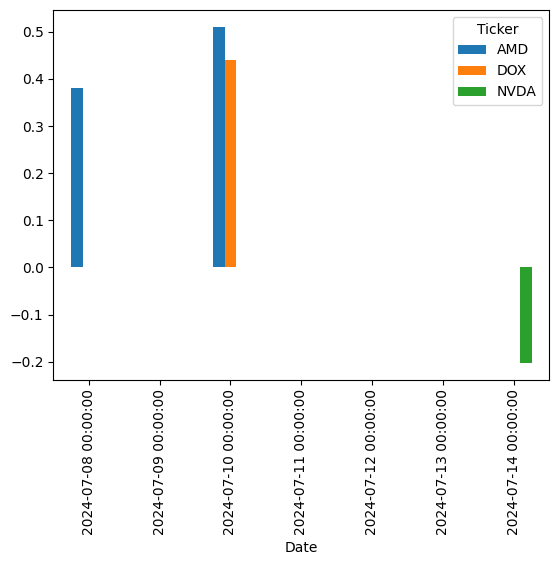

In [78]:
plt.figure(figsize = (10, 8))

mean_df = df_to_plot.groupby(['Ticker', 'Date'])['Compound'].mean()
print(mean_df)
mean_df = mean_df.unstack()  # 'Compound' is now a level in the column index, not a column name.
mean_df = mean_df.transpose()
print(mean_df)

mean_df.plot(kind = 'bar')
plt.show()

In [81]:
!pip show beautifulsoup4 nltk pandas matplotlib


Name: beautifulsoup4
Version: 4.12.3
Summary: Screen-scraping library
Home-page: 
Author: 
Author-email: Leonard Richardson <leonardr@segfault.org>
License: MIT License
Location: /usr/local/lib/python3.10/dist-packages
Requires: soupsieve
Required-by: gdown, google, nbconvert, yfinance
---
Name: nltk
Version: 3.8.1
Summary: Natural Language Toolkit
Home-page: https://www.nltk.org/
Author: NLTK Team
Author-email: nltk.team@gmail.com
License: Apache License, Version 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: click, joblib, regex, tqdm
Required-by: textblob
---
Name: pandas
Version: 2.0.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: 
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License
        
        Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
        All rights reserved.
        
        Copyright (c) 2011-202